## Transformata Fouriera i filtracja przy pomocy maski
Celem zadania jest zaimplementowanie filtracji obrazu przy pomocy maski i transformaty Fouriera. 
Aby tego dokonać należy:
1. Przejrzeć część wykładku dotyczącego transformaty Fouriera i filtracji w dziedzinie częstotliwości.
2. Znaleźć rozwiązanie na slajdzie.
3. Zaimplementować rozwiazanie w odpowiednim miejscu w kodzie.
4. Zmierzyć czas wykonania operacji.

Filtracja odbywa się w dziedzinie częstotliwości więc:

x = F(img) - transformata Fouriera obrazu img

m = F(mask) - transformata Fouriera maski. Jak to zrobić zostało wyjaśnione na wykładzie.

x' = x * m - mnożenie punktowe

y = F^-1(x') - odwrotna transformata Fouriera


### Dodatkowo
Zaimplementuj funkcję `create_fft_mask` zgodnie z opisem znajdującym się na wykładzie.

Zaimplementują funkcję `apply_mask_with_fft` zgodnie z opisem znajdującym się na wykładzie.

Zmierz czas wykonywania funkcji `apply_mask_with_fft` i `apply_mask_with_convole` dla danego obrazu i maski składającej się z samych jedynek. Zbadaj czas operacji dla masek o rozmiarze {3, 9, 27, 81}. Kiedy bardziej opłaca się użyć transformaty Fouriera?

(4000, 6000) float32 0.0 0.99916667
 Czas dzialania  dla convole: 0.11549901962280273  
 Czas dzialania  dla fft: 3.3829996585845947  


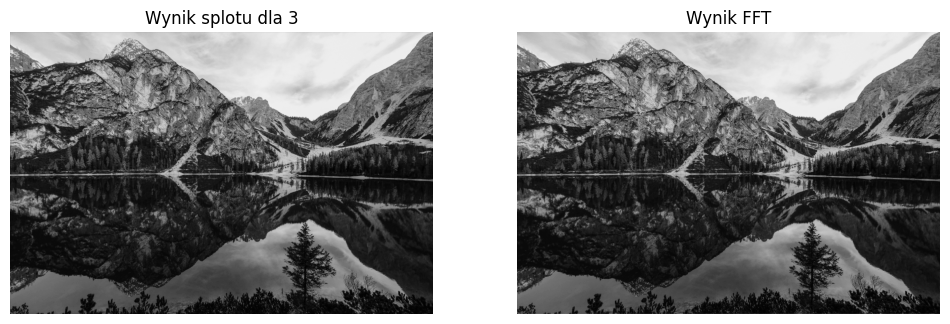

 Czas dzialania  dla convole: 0.8145003318786621  
 Czas dzialania  dla fft: 3.3139994144439697  


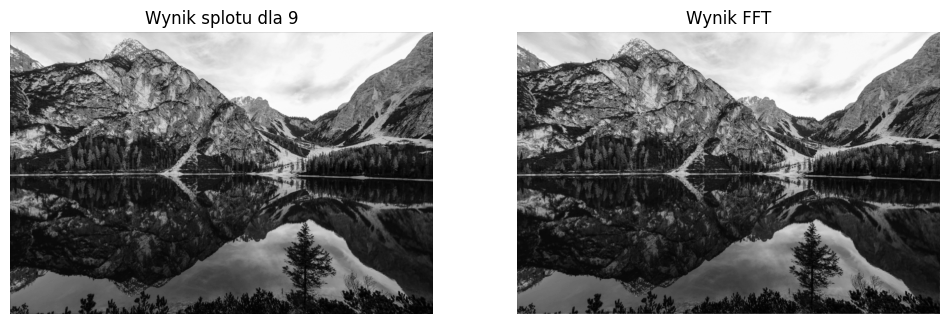

 Czas dzialania  dla convole: 6.487999439239502  
 Czas dzialania  dla fft: 3.3459997177124023  


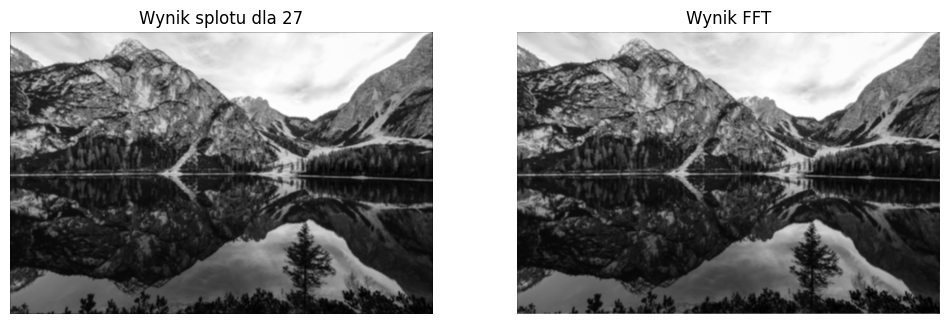

 Czas dzialania  dla convole: 60.17550015449524  
 Czas dzialania  dla fft: 3.290999174118042  


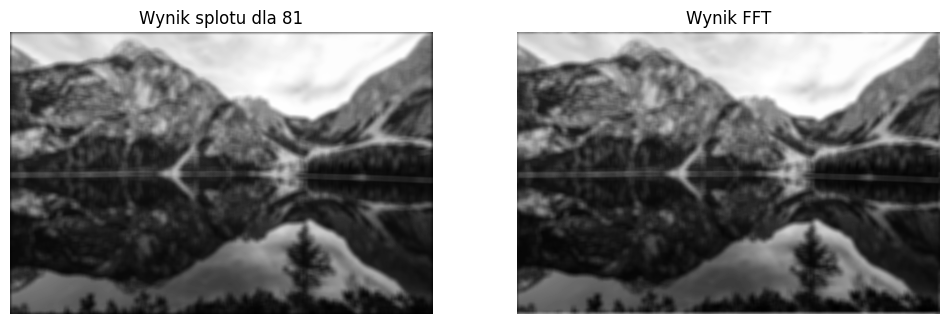

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
from scipy import ndimage
import time
from numpy.fft import fft2, ifft2, ifftshift

def create_fft_mask(mask: np.ndarray, shape: Tuple[int, int]) -> np.ndarray:
    ## Umieść swój kod tutaj
    padded_mask = np.zeros(shape, dtype=np.float32)
    mask_shape = mask.shape
    start_x = (shape[0] - mask_shape[0]) // 2
    start_y = (shape[1] - mask_shape[1]) // 2
    padded_mask[start_x:start_x + mask_shape[0], start_y:start_y + mask_shape[1]] = mask
    transformed_mask = fft2(ifftshift(padded_mask))
    return transformed_mask


def apply_mask_with_convole(image: np.ndarray, mask: np.ndarray) -> np.ndarray:
    return ndimage.convolve(image, mask, mode='constant', cval=0.0)

def apply_mask_with_fft(image: np.ndarray, mask: np.ndarray) -> np.ndarray:
    fft_mask = create_fft_mask(mask, image.shape)
    ## Umieść swój kod tutaj
    fft_mask = create_fft_mask(mask, image.shape)
    fft_image = fft2(image)
    fft_filtered = fft_image * fft_mask
    filtered_image = np.abs(ifft2(fft_filtered))
    return filtered_image


if __name__ == '__main__':
    image = io.imread('bardzo-duzy-obraz.jpg', as_gray=True).astype(np.float32)
    print(image.shape, image.dtype, image.min(), image.max())
    
    for filter_size in [3, 9, 27, 81]:
        mask = np.ones((filter_size, filter_size), dtype=np.float32) / (filter_size ** 2)

        start_time = time.time()
        con_img = apply_mask_with_convole(image, mask)
        end_time = time.time() - start_time
        plt.figure(figsize=(12, 8))
        print(f" Czas dzialania  dla convole: {end_time}  ")

        plt.subplot(1, 2, 1)
        plt.title(f"Wynik splotu dla {filter_size}")
        plt.imshow(con_img, cmap='gray')
        plt.axis('off')

        start_time = time.time()
        fft = apply_mask_with_fft(image, mask)
        end_time = time.time() - start_time
        print(f" Czas dzialania  dla fft: {end_time}  ")
       

        plt.subplot(1, 2, 2)
        plt.title("Wynik FFT")
        plt.imshow(fft, cmap='gray')
        plt.axis('off')
        plt.show()
        pass
